# Linear Classifier

### Download Iris dataset
Follow the link and download the Iris dataset:  
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from sklearn.linear_model import Perceptron

In [2]:
class _LinearClassifier:

    def __init__(self, method='perceptron', alpha=0.0001, epsilon=0.1, max_iter=300):
        self.method = method
        self.alpha = alpha
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.b = None
        self.w = None

    def fit(self, X, y):
        self.b = np.random.sample() * self.alpha
        self.w = np.random.sample(len(X.T)) * self.alpha
        current_iter = 0

        while True:
            current_iter += 1
            if current_iter > self.max_iter:
                break

            if self.method == 'perceptron':
                old_b, old_w = [self.b, self.w]
                for i in range(len(X)):
                    y_pred = self._phi_perceptron(np.sum((X[i] * self.w)) + self.b)
                    delta_b = self.alpha * (y[i] - y_pred)
                    delta_w = self.alpha * (y[i] - y_pred) * X[i]
                    self.b += delta_b
                    self.w += delta_w
                if old_b == self.b and np.array_equal(old_w, self.w):
                    break

            elif self.method == 'adaline': # batch
                y_pred = self._phi_adaline(np.sum(X * self.w, axis=1) + self.b)
                delta_b = self.alpha * np.sum(y - y_pred)
                delta_w = self.alpha * np.sum((y - y_pred) * X.T, axis=1)
                self.b += delta_b
                self.w += delta_w
                if (delta_b ** 2) + np.sum(delta_w ** 2) < self.epsilon:
                    break

        print('Iterations:', current_iter)
        return self

    # activation functions
    def _phi_perceptron(self, z):
        return -1 if z < 0 else 1

    def _phi_adaline(self, z):
        return z

    # quantizer
    def predict(self, X):
        a = np.sum((X * self.w), axis=1) + self.b
        return np.where(a < 0, -1, 1)

### Importing data

In [3]:
X = pd.read_csv('datasets/iris.data.csv')
X = X[X['class'].isin(['Iris-setosa', 'Iris-versicolor'])]
X['class'] = np.where(X['class'] == 'Iris-setosa', -1, 1)

### Standardization and slicing

In [4]:
x_fields = ['sepal length', 'petal width']
X[x_fields] = StandardScaler().fit_transform(X[x_fields])
X_train, X_test, y_train, y_test = train_test_split(np.array(X[x_fields]), np.array(X['class']), test_size=0.2)

## Perceptron

### Fitting

In [5]:
y_pred = _LinearClassifier(method='perceptron').fit(X_train, y_train).predict(X_test)

Iterations: 1


### Accuracy check

In [6]:
accuracy_score(y_test, y_pred)

1.0

### Scatterplot

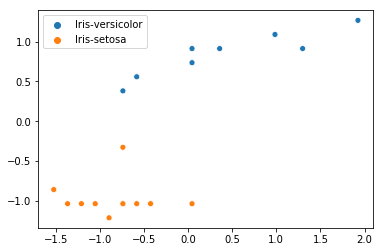

In [7]:
sns.scatterplot(x=X_test.T[0], y=X_test.T[1],
                hue=np.where(y_pred == -1, 'Iris-setosa', 'Iris-versicolor'))

## Adaptive linear neuron (Adaline)

### Fitting

In [8]:
y_pred = _LinearClassifier(method='adaline', alpha=0.01).fit(X_train, y_train).predict(X_test)

Iterations: 3


### Accuracy check

In [9]:
accuracy_score(y_test, y_pred)

1.0

### Scatterplot

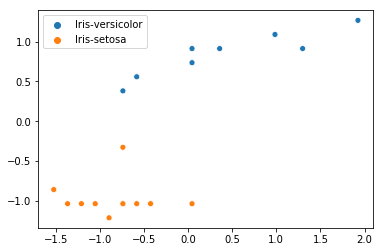

In [10]:
sns.scatterplot(x=X_test.T[0], y=X_test.T[1],
                hue=np.where(y_pred == -1, 'Iris-setosa', 'Iris-versicolor'))